# Workshop 2 c: SciPy
This is very short introduction to Scipy, much of content here is taken from the excellent [SciPy tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html).

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data.

SciPy is organized into subpackages covering different scientific computing domains. These are summarized in the following table:

| Subpackage | Description |
|---| ---|
| cluster    | Clustering algorithms |
| constants | Physical and mathematical constants |
| fftpack | Fast Fourier Transform routine |
| integrate| Integration and ordinary differential equation solvers |
| interpolate | Interpolation and smoothing splines |
| io | Input and Output |
| linalg | Linear algebra |
| ndimage | N-dimensional image processing |
| odr | Orthogonal distance regression |
| optimize | Optimization and root-finding routines |
| signal | Signal processing |
| sparse | Sparse matrices and associated routines |
| spatial | Spatial data structures and algorithms |
| special | Special functions |
| stats | Statistical distributions and functions |

These subpackages are called explicitly: 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

In [2]:
interp1d?

In [3]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)

NameError: name 'xnew' is not defined

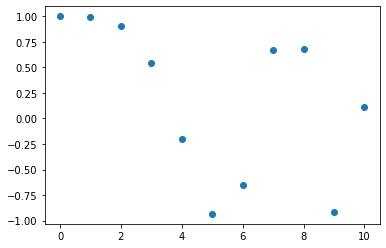

In [4]:
plt.plot(x, y, 'o')
plt.plot(xnew, f(xnew), '-')
plt.plot(xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()


# <span style="color:blue">Exercise</span>
This time, only a single exercise to make you familiar with the use pattern of SciPy.

1. Use a SciPy function to solve a linear regression problem of the following random data:
```
np.random.seed(12345678)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)
```
Print the slope, intercept, and $R^2$ values and make a plot.
<img src="Figures/2d1.png" width="600">





## <span style="color:green">Solutions</span>
Again, this is a  possible solutions.



slope: 1.9448642607472155; intercept: 0.26857823524544855; R^2: 0.7354980392850927


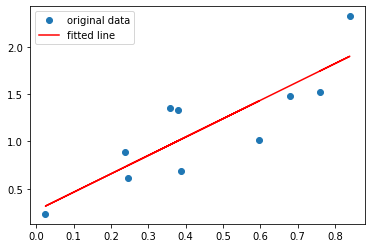

In [6]:
# 1. Use a SciPy function to solve a linear regression problem
# of the following random data [...].
# Print the slope, intercept, and $R^2$ values and make a plot
from scipy import stats

np.random.seed(12345678)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f'slope: {slope}; intercept: {intercept}; R^2: {r_value**2}')

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.savefig('Figures/2d1')